<a href="https://colab.research.google.com/github/mertbkts/Covid19-Prediction-From-LungCT/blob/main/PredictAnImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

Importing Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import decimal

Importing Model, Weight and The Image We Want To Predict

In [3]:
model = keras.models.load_model(#' Please enter your model's path here')
model.load_weights(#' Please enter your weight's path here')

In [4]:
ImagePath = #' Please enter the path of the image you want to predict'

Preprocessing

In [5]:
# Read image, change color channel to RGB and resize the image to 224x224 pixels
img = image.load_img(ImagePath,color_mode='rgb', target_size=(224, 224))
# Convert image to a array and normalize
x = image.img_to_array(img) / 255.0
# Expand the shape of the array to fit the model
x = np.expand_dims(x, axis=0)

# Prediction

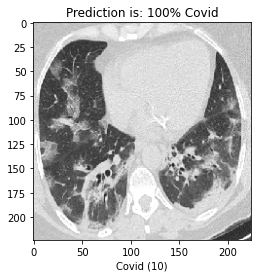

In [8]:
from pathlib import Path
prediction = model.predict(x)

# Extract the non-covid probability from the prediction, convert the float value to integer
probability=int((prediction[0][1])*100)

# If the probability is lower than %50, it means the CT belongs to a person who is sick with covid
if(probability>50):
    plt.title('Prediction is: %d' %probability + '% Non-Covid')
else:
    plt.title('Prediction is: %d' %(100-probability) + '% Covid')

# Show results
plt.xlabel(Path(ImagePath).stem)
plt.imshow(img)
plt.show()